# Data checking

In [1]:
import numpy as np
import pandas as pd
data = pd.read_csv('data.csv')

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Flight ID                      3000 non-null   int64  
 1   Airline                        3000 non-null   object 
 2   Flight_Distance                3000 non-null   int64  
 3   Origin_Airport                 3000 non-null   object 
 4   Destination_Airport            3000 non-null   object 
 5   Scheduled_Departure_Time       3000 non-null   int64  
 6   Day_of_Week                    3000 non-null   int64  
 7   Month                          3000 non-null   int64  
 8   Airplane_Type                  3000 non-null   object 
 9   Weather_Score                  3000 non-null   float64
 10  Previous_Flight_Delay_Minutes  3000 non-null   float64
 11  Airline_Rating                 3000 non-null   float64
 12  Passenger_Load                 3000 non-null   f

In [3]:
data = data.drop_duplicates()

#### Checking for missing values

In [4]:
missing_values = data.isnull().sum()

print(missing_values)

Flight ID                        0
Airline                          0
Flight_Distance                  0
Origin_Airport                   0
Destination_Airport              0
Scheduled_Departure_Time         0
Day_of_Week                      0
Month                            0
Airplane_Type                    0
Weather_Score                    0
Previous_Flight_Delay_Minutes    0
Airline_Rating                   0
Passenger_Load                   0
Flight_Cancelled                 0
dtype: int64


#### Checking and removing outliers using boxplots

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 0 to 2999
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Flight ID                      3000 non-null   int64  
 1   Airline                        3000 non-null   object 
 2   Flight_Distance                3000 non-null   int64  
 3   Origin_Airport                 3000 non-null   object 
 4   Destination_Airport            3000 non-null   object 
 5   Scheduled_Departure_Time       3000 non-null   int64  
 6   Day_of_Week                    3000 non-null   int64  
 7   Month                          3000 non-null   int64  
 8   Airplane_Type                  3000 non-null   object 
 9   Weather_Score                  3000 non-null   float64
 10  Previous_Flight_Delay_Minutes  3000 non-null   float64
 11  Airline_Rating                 3000 non-null   float64
 12  Passenger_Load                 3000 non-null   f

<AxesSubplot: >

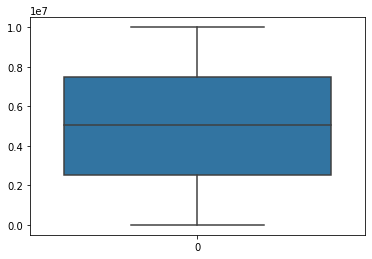

In [6]:
# Checking outliers for Flight Id column
import seaborn as sns
sns.boxplot(data['Flight ID'])

<AxesSubplot: >

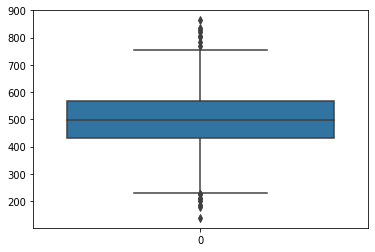

In [7]:
# Checking outliers for the Flight_Distance column
sns.boxplot(data['Flight_Distance'])

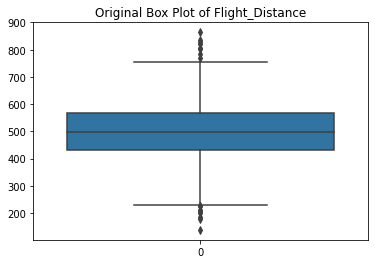

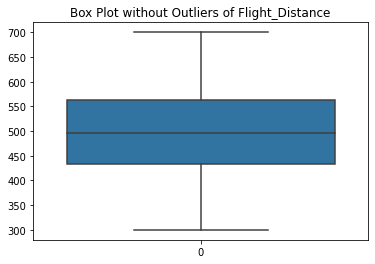

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

def removal_box_plot(data, column, lower_threshold, upper_threshold):
    sns.boxplot(data[column])
    plt.title(f'Original Box Plot of {column}')
    plt.show()

    removed_outliers = data[(data[column] >= lower_threshold) & (data[column] <= upper_threshold)]

    sns.boxplot(removed_outliers[column])
    plt.title(f'Box Plot without Outliers of {column}')
    plt.show()

    return removed_outliers

# Specify the threshold values
lower_threshold = 300
upper_threshold = 700

data_new = removal_box_plot(data, 'Flight_Distance', lower_threshold, upper_threshold)


<AxesSubplot: >

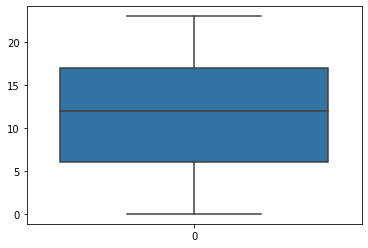

In [9]:
# Checking outliers for the Scheduled_Departure_Time column     
sns.boxplot(data_new['Scheduled_Departure_Time'])

<AxesSubplot: >

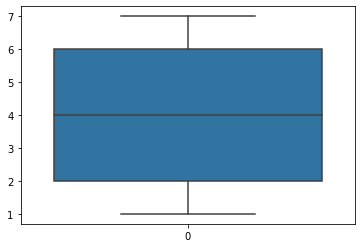

In [10]:
# Checking outliers for the Day_of_Week column     
sns.boxplot(data_new['Day_of_Week'])

<AxesSubplot: >

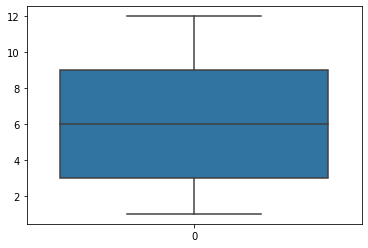

In [11]:
# Checking outliers for the Month column     
sns.boxplot(data_new['Month'])

<AxesSubplot: >

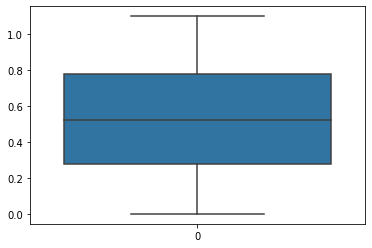

In [12]:
# Checking outliers for the Weather_Score column     
sns.boxplot(data_new['Weather_Score'])

<AxesSubplot: >

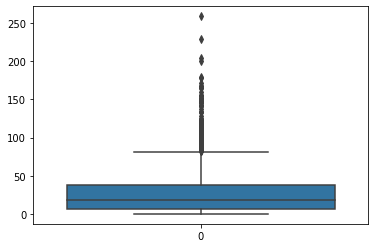

In [13]:
# Checking outliers for the Previous_Flight_Delay_Minutes column
sns.boxplot(data_new['Previous_Flight_Delay_Minutes'])

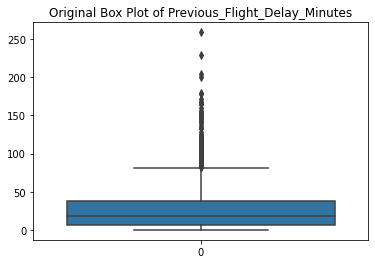

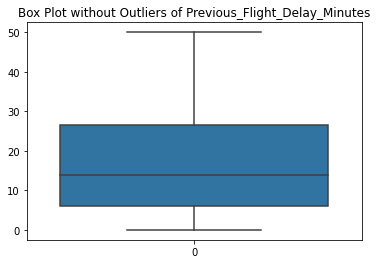

In [14]:
def removal_box_plot(data_new, column, threshold):
    sns.boxplot(data_new[column])
    plt.title(f'Original Box Plot of {column}')
    plt.show()

    removed_outliers = data_new[data_new[column] <= threshold]

    sns.boxplot(removed_outliers[column])
    plt.title(f'Box Plot without Outliers of {column}')
    plt.show()
    
    return removed_outliers

threshold_value = 50

data_new1 = removal_box_plot(data_new, 'Previous_Flight_Delay_Minutes', threshold_value)

<AxesSubplot: >

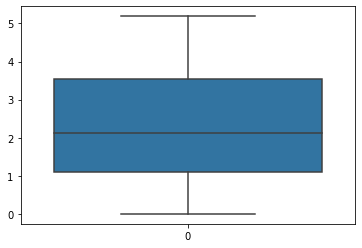

In [15]:
# Checking outliers for Airline_Rating column
sns.boxplot(data_new['Airline_Rating'])

<AxesSubplot: >

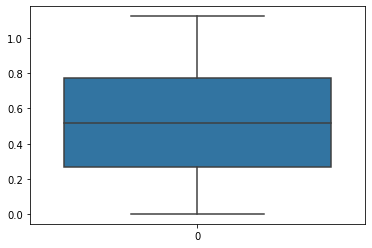

In [16]:
# Checking outliers for the Passenger_Load column
sns.boxplot(data_new['Passenger_Load'])

<AxesSubplot: >

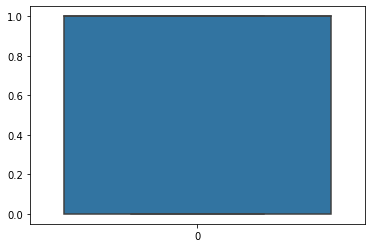

In [17]:
# Checking outliers for the Flight_Cancelled column
sns.boxplot(data_new['Flight_Cancelled'])

#### Checking the data types for each column

In [18]:
print(data_new1.dtypes)

Flight ID                          int64
Airline                           object
Flight_Distance                    int64
Origin_Airport                    object
Destination_Airport               object
Scheduled_Departure_Time           int64
Day_of_Week                        int64
Month                              int64
Airplane_Type                     object
Weather_Score                    float64
Previous_Flight_Delay_Minutes    float64
Airline_Rating                   float64
Passenger_Load                   float64
Flight_Cancelled                   int64
dtype: object


In [20]:
data_new1.head()

,Flight ID,Airline,Flight_Distance,Origin_Airport,Destination_Airport,Scheduled_Departure_Time,Day_of_Week,Month,Airplane_Type,Weather_Score,Previous_Flight_Delay_Minutes,Airline_Rating,Passenger_Load,Flight_Cancelled
0,7319483,Airline D,475,Airport 3,Airport 2,4,6,1,Type C,0.225122,5.0,2.151974,0.477202,0
2,2991718,Airline C,565,Airport 1,Airport 2,17,3,9,Type C,0.093920,18.0,4.406848,0.256803,0
3,4220106,Airline E,658,Airport 5,Airport 3,1,1,8,Type B,0.656750,13.0,0.998757,0.504077,1
4,2263008,Airline E,566,Airport 2,Airport 2,19,7,12,Type E,0.505211,4.0,3.806206,0.019638,0
5,9450813,Airline B,446,Airport 4,Airport 5,3,5,2,Type D,0.030072,5.0,2.228958,0.424126,0


##### The data types are appropriate for the data they represent.